In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
iris= pd.read_csv(r"C:\Users\stuar\Documents\College\Data Mining\Assignment\iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
lab = preprocessing.LabelEncoder()
iris.Species = lab.fit_transform(iris.Species) #converting string labels to numeric
iris = iris.drop("Id",axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = iris.iloc[:, :-1].values
Y = iris.loc[:,'Species'].values
X= StandardScaler().fit_transform(X)
pca = PCA(n_components=4)

In [5]:
pcomponents= pca.fit(X).transform(X)
pDf = pd.DataFrame(data = pcomponents,columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3','Principal Component 4'])
finalDf = pd.concat([pDf, iris[['Species']]], axis = 1)
print(finalDf)

     Principal Component 1  Principal Component 2  Principal Component 3  \
0                -2.264542               0.505704              -0.121943   
1                -2.086426              -0.655405              -0.227251   
2                -2.367950              -0.318477               0.051480   
3                -2.304197              -0.575368               0.098860   
4                -2.388777               0.674767               0.021428   
..                     ...                    ...                    ...   
145               1.870522               0.382822               0.254532   
146               1.558492              -0.905314              -0.025382   
147               1.520845               0.266795               0.179277   
148               1.376391               1.016362               0.931405   
149               0.959299              -0.022284               0.528794   

     Principal Component 4  Species  
0                -0.023073        0  
1          

In [23]:
var=(pca.explained_variance_ratio_)
print(var)

[0.72770452 0.23030523 0.03683832 0.00515193]


In [27]:
var=np.cumsum(pca.explained_variance_ratio_*100)
print("Cummulative Sum of Explained Variance Ratio: ",var)

Cummulative Sum of Explained Variance Ratio:  [ 72.77045209  95.80097536  99.48480732 100.        ]


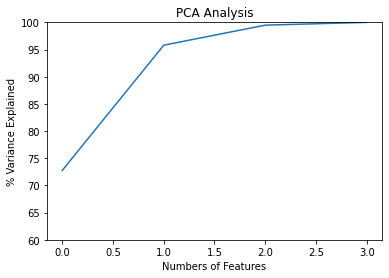

In [28]:
plt.ylabel('% Variance Explained')
plt.xlabel('Numbers of Features')
plt.title('PCA Analysis')
plt.ylim(60,100)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

### From above graph, we can conclude that First Principal Component and Second Principal Component explains variance of 72.77% and 23.03% respectively. So cumulative sum of variance of first principal and second principal component, gives more than 95% of variance of original data i.e. (72.77+23.03)%= 95.80%. Which implies that we don't other features for explaining the data. So we reduced our 4 features to 2 features in order to gain maximum information from original dataset.

# Original Feature Variance


In [29]:
print("Sepal Length Variance : ",np.var(iris['SepalLengthCm']))
print("Sepal Width Variance  : ",np.var(iris['SepalWidthCm']))
print("Petal Length Variance : ",np.var(iris['PetalLengthCm']))
print("Petal Width Variance  : ",np.var(iris['PetalWidthCm']))

Sepal Length Variance :  0.6811222222222223
Sepal Width Variance  :  0.18675066666666668
Petal Length Variance :  3.092424888888889
Petal Width Variance  :  0.5785315555555555


# Total Variance of original feature

In [30]:
total_var=[np.var(iris['SepalLengthCm']),np.var(iris['SepalWidthCm']),np.var(iris['PetalLengthCm']),np.var(iris['PetalWidthCm'])]
print("Total Variance of Original feature: ",sum(total_var))

Total Variance of Original feature:  4.538829333333333


# Variance of 4 Eigen Vector

In [31]:
x_df=pd.DataFrame(X)
y_df=pd.DataFrame(pcomponents)
x_df.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
y_df.columns=['PC1','PC2','PC3','PC4']

In [32]:
print(y_df.PC1.var())
print(y_df.PC2.var())
print(y_df.PC3.var())
print(y_df.PC4.var())

2.9303537755893143
0.927403621517341
0.1483422264816401
0.020746013995595874


In [26]:
total_var_vec=[y_df.PC1.var(),y_df.PC2.var(),y_df.PC3.var(),y_df.PC4.var()]
print("Total variance of 4 Eigen Vector: ",sum(total_var_vec))

Total variance of 4 Eigen Vector:  4.026845637583891


### As here we can observe that total variance of original feature and total variance of 4 eigen vectors are similar. And variance of first 2 Eigen vectors represents maximum data variance.